## The Disordered TF Ising model

If we now add spatial disorder to the bonds and fields, the Ising Hamiltonian reads

\begin{equation*}
H(t)=-J \sum_{i}^{N-1} \big(1+\alpha J_{i}\big) \sigma_{i}^{x} \sigma_{i+1}^{x}-\sum_{i}^{N}\left\{h_{0} \sin (\omega t)+\alpha h_{i}\right\} \sigma_{i}^{z}
\end{equation*}

where $J_i, h_i$ are random numbers drawn from the range $[-1,1]$, and $\alpha$ is the disorder strength. A Jordan-Wigner transformation to fermions leads to the Hamiltonian [REFS: fate paper and Bigan Mbeng et al 2020]
\begin{equation*}
\widehat{H}(t)=\left(\hat{\mathbf{c}}^{\dagger}, \hat{\mathbf{c}}\right)\left(\begin{array}{cc}
\mathbf{A}(t) & \mathbf{B} \\
-\mathbf{B} & -\mathbf{A}(t)
\end{array}\right)\left(\begin{array}{l}
\hat{\mathbf{c}} \\
\hat{\mathbf{c}}^{\dagger}
\end{array}\right),
\end{equation*}
with the Nambu Spinors
\begin{equation*}
\left(\hat{\mathbf{c}}^{\dagger}, \hat{\mathbf{c}}\right) = \left(\hat{c}_{1}^{\dagger}, \cdots, \hat{c}_{N}^{\dagger}, \hat{c}_{1}, \cdots, \hat{c}_{N}\right),
\end{equation*}
and the matrices
\begin{align*}
\mathbf{A}(t) &= h(t)\times\mathbf{1} +\alpha \big(\mathbf{h} + \mathbf{J}/2\big)+\mathbf{D}/2\\
\mathbf{B}(t) &=\frac12 \big(\mathbf{\overline{D}} + \alpha J \mathbf{\overline{J}}\big)\\
h(t) &= h_0 + h\cos{\omega t}.
\end{align*}
Here, the matrix components of $\mathbf{h}$ are $\mathbf{h}_{ij} = h_i\delta_{ij}$, the matrix $\mathbf{J}$ is a tridiagonal symmetric matrix with components $J_i$ along the super and sub-diagonals, and $\mathbf{\overline{J}}$ is a tridiagonal antisymmetric matrix with components $\mp J_i$ along the super (sub) diagonals. Finally, the matrix $\mathbf{D}$ is a tridiagonal symmetric matrix with $1$ along the super and sub-diagonals, and $\mathrm{\overline{D}}$ is a tridiagonal anti-symmetric matrix with $\mp 1$ along the super (sub) diagonals.

Thus, the dynamics of the full system lies entirely on an invariant subspace of size $2N\times 2N$. Note that the formulae above only hold for open boundary conditions. The IPR of the Floquet states can now be computed in a manner similar to the clean Ising model discussed above, except with $2N$ components. In more qutip-friendly notation, the effective $2N\times 2N$ Hamiltonian 
\begin{align*}
\overline{H}(t) &= \overline{H}_0 + h(t)\overline{H}_1\\
\overline{H}_0 &=  \begin{pmatrix}\alpha \big(\mathbf{h} + \mathbf{J}/2\big) + \mathbf{D}/2 & \mathbf{0}\\ \mathbf{0} & -\alpha \big(\mathbf{h}+\mathbf{J}/2\big)-\mathbf{D}/2 \end{pmatrix} + \frac12\begin{pmatrix}\mathbf{0} & \big(\mathbf{\overline{D}} + \alpha J\mathbf{\overline{J}}\big)\\-\big(\mathbf{\overline{D}}+\alpha J\mathbf{\overline{J}}\big) & \mathbf{0}\end{pmatrix}\\
\overline{H}_1 &=  \begin{pmatrix}\mathbf{1} & \mathbf{0} \\ \mathbf{0} & -\mathbf{1} \end{pmatrix}
\end{align*}
Finally, in the actual time evolution, the hamiltonian has to be doubled, since the sums over $2N$ result in each set of $0-N$ sums repeating twice. Thus, our propagator $\overline{U}(t)$ starts from unity at $t=0$ and evolves as
\begin{equation}
i \frac{d}{dt}\overline{U}(t) = 2\overline{H}(t)\; \overline{U}(t).
\end{equation}
Now, Floquet's theorem guarantees $2N-$sized column spinor solutions of the type $\Psi_\mu(t)  =\Phi_\mu(t) e^{-i \epsilon_{\mu} t}$, where the Floquet mode spinors
\begin{equation*}
\Phi_\mu(t)=\begin{pmatrix}
\mathbf{u}_{ \mu}(t) \\
\mathbf{v}_{\mu}(t)
\end{pmatrix} \quad \text { for } \mu=1 \cdots N
\end{equation*}
are periodic, and can be readily obtained from qutip. However, the localization of these states, measured by the Inverse participation ratio, is given by the square of each spinor density. This is different from standard IPR calculations, and yields
\begin{equation*}
\Phi^{IPR}_\nu = \sum_\mu \Big\vert\big\vert \mathbf{u}_{\mu\nu} \big\vert^2 + \big\vert \mathbf{v}_{\mu\nu} \big\vert^2\big\vert  \Big\vert^2
\end{equation*}

In [1]:
from datetime import datetime
print(datetime.now())
import numpy as np
from qutip import Qobj, basis, mesolve, Options
from scipy.special import j0

def drive(t, args):
    h0 = args['h0']
    h = args['h']
    w = args['omega']
    return h0 + h * np.sin(w * t)

#Verified to be true
def get_disorder_hamilts(args):
    N= args['N']
    alpha = args["alpha"]
    # Construct the Hamiltonian
    bonds = np.random.uniform(-1,1,N-1)
    fields = np.random.uniform(-1,1,N)
    
    hmat = np.diag(fields)
    jmat = np.diag(bonds, k=1) + np.diag(bonds, k=-1)
    jmat_bar = -np.diag(bonds, k=1) + np.diag(bonds, k=-1)
    
    dmat = np.diag(np.ones(N-1), k=1) + np.diag(np.ones(N-1), k=-1)
    dmat_bar = - np.diag(np.ones(N-1), k=1) + np.diag(np.ones(N-1), k=-1)
    
    H0 = np.zeros((2*N, 2*N))
    H1 = np.zeros((2*N, 2*N))
    
    H0[0:N,0:N] = alpha * (hmat + jmat/2) + dmat/2
    H0[N:,N:] = -alpha * (hmat + jmat/2) - dmat/2
    
    H0[0:N, N:] = 0.5 * ( dmat_bar + alpha * jmat_bar)
    H0[N:, 0:N] = - 0.5 *(dmat_bar +  alpha * jmat_bar)
    
    d = np.ones(2*N)
    d[N:] = -1
    H1 = np.diag(d)
    return H0, H1

#This might be wrong
def get_floquet_isingdisorder(args, **kwargs):
    N = args['N']
    H0, H1 = get_disorder_hamilts(args)
    #Need to multiply Hamiltonian by 2
    H = [Qobj(2*H0),[Qobj(2*H1),drive]] 
    T = 2 * np.pi/args['omega']
    f_mat = np.empty((2*N, 2*N), dtype=np.complex128)
    for i in range(2*N):
        baseket = basis(2*N,i)
        if i == 3:
            print("Start From:")
            print(baseket)
        solv_state = mesolve(H, baseket, [0,T], [], [], args = args, **kwargs)
        final = solv_state.states[-1].full().flatten()
        if i == 3:
            print("Wind up at:")
            print(final)
        f_mat[:,i] = final
    
    _, f_estates = np.linalg.eig(f_mat)
    return f_estates

def get_iprvals_disorder(args, **kwargs):
    floquet_matrix = get_floquet_isingdisorder(args, **kwargs)   
    N = args['N']
    U_mat = floquet_matrix[0:N,0:N]
    V_mat = floquet_matrix[N:,0:N]
    iprmat = np.abs(np.abs(U_mat)**2 + np.abs(V_mat)**2)**2
    return np.sum(iprmat, axis=0)

2022-08-26 10:28:14.218804


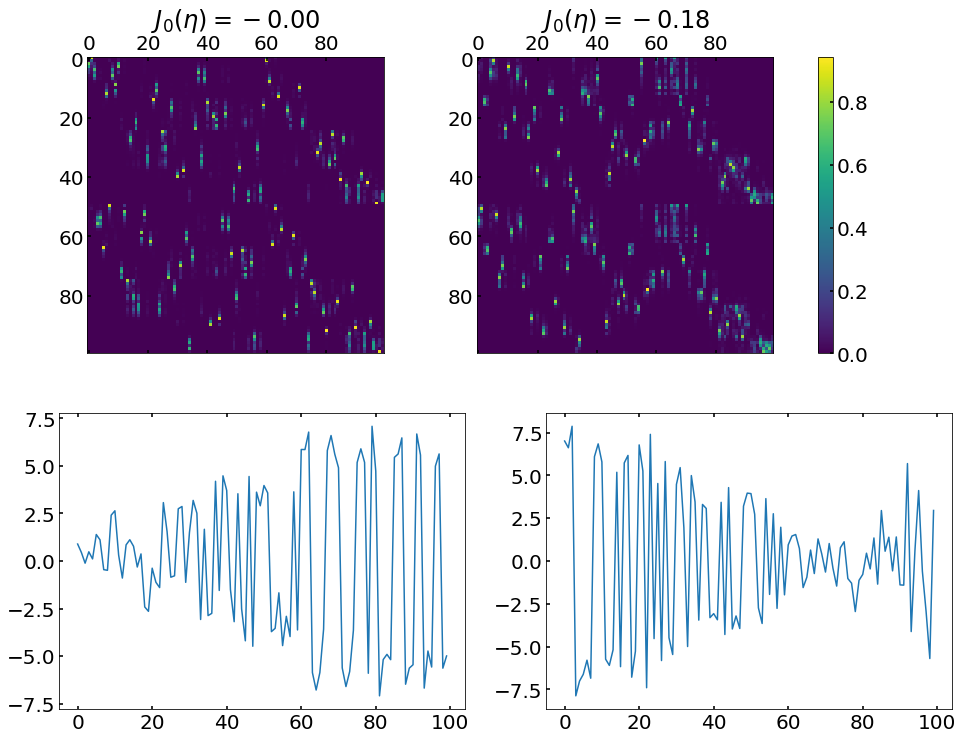

In [3]:
from qutip import propagator
from scipy.special import j0, jn_zeros
import matplotlib.pyplot as plt
plt.rcParams.update({
    "figure.figsize": (16, 12),
    "text.usetex": False,
    "font.size": 20})
N = 50

h0 = 0
h = 20.0
alpha = 3.0

etas = jn_zeros(0,4)
eta = etas[1]
w_frz = 4*h/eta

w_nfrz = 0.8 * h

#Qutip Solver Options
opts = Options(nsteps=1e5)
params_frz = {'h0':h0, 'h': h, 'omega': w_frz, 'alpha': alpha, 'N':N}
params_nfrz = {'h0':h0, 'h': h, 'omega': w_nfrz, 'alpha': alpha, 'N':N}
fig, axs = plt.subplots(2,2)

for i, p in enumerate([params_frz, params_nfrz]):
    H0, H1 = get_disorder_hamilts(p)
    H = [Qobj(2*H0),[Qobj(2*H1),drive]] 

    h = p['h']
    w = p['omega']
    T = 2 * np.pi/w
    n = 1
    times = np.linspace(0,n*T, 500)

    Ut = propagator(H, times, c_op_list=[], args=p, options=None, parallel=True)

    exp_eps, U = np.linalg.eig(np.array(Ut[-1]))
    eps = np.real((1j)*np.log(exp_eps))/(n*T)
    #idx = np.argsort(eps)
    #exp_eps = exp_eps[idx]
    #eps = eps[idx]
    #U = U[:,idx]
    
    im = axs[0,i].matshow(np.abs(U))
    axs[0,i].set_title(r'$J_0(\eta) ={:1.2f} $'.format(j0(4*h/w)))
    axs[1,i].plot(eps)
    
fig.colorbar(im, ax=axs[0,:].ravel().tolist())
plt.show()

In [ ]:
import matplotlib.pyplot as plt
from scipy.special import j0, jn_zeros
plt.rcParams.update({
    "figure.figsize": (16, 12),
    "text.usetex": False,
    "font.size": 20})

N = 25

h0 = 0
h = 7.0
alpha = 0.0

etas = jn_zeros(0,4)
eta = etas[1]
w_frz = 4*h/eta

w_nfrz = w_frz * 1.2

#Qutip Solver Options
opts = Options(nsteps=1e5)

fig, axs = plt.subplots(1,2, sharey=True)

for i, alpha in enumerate([0.0, 0.3]):
    params_frz = {'h0':h0, 'h': h, 'omega': w_frz, 'alpha': alpha, 'N':N}
    params_nfrz = {'h0':h0, 'h': h, 'omega': w_nfrz, 'alpha': alpha, 'N':N}
    axs[i].set_title(r'$\alpha={:1.1f}$'.format(alpha))

    for p in (params_frz, params_nfrz):
        M = get_iprvals_disorder(p, options=opts)
        
        axs[i].plot(M,label=r'$J_0(\eta) ={:1.2f} $'.format(j0(4*p['h']/p['omega'])))
        
        axs[i].set_xlabel(r'$n$')
        #axs[i].set_ylim(-0.03, 1.03)
        
axs[0].set_ylabel(f'$\phi_{{IPR}}$')
axs[0].legend()
#plt.savefig('isingdisorder_ipr_jali.svg')
plt.show()

In [ ]:
from qutip import propagator
import matplotlib.pyplot as plt
from scipy.special import j0, jn_zeros
plt.rcParams.update({
    "figure.figsize": (16, 12),
    "text.usetex": False,
    "font.size": 20})

N = 50

h0 = 0
h = 20.0
alpha = 0.0

etas = jn_zeros(0,4)
eta = etas[1]
w_frz = 4*h/eta

w_nfrz = 0.8 * h

#Qutip Solver Options
opts = Options(nsteps=1e5, openmp_threads=1)
params_frz = {'h0':h0, 'h': h, 'omega': w_frz, 'alpha': alpha, 'N':N}
params_nfrz = {'h0':h0, 'h': h, 'omega': w_nfrz, 'alpha': alpha, 'N':N}

for w in [w_frz, w_nfrz]:
    p = {'h0':h0, 'h': h, 'omega': w, 'alpha': alpha, 'N':N}
    H0, H1 = get_disorder_hamilts(p)
    H = [Qobj(2*H0),[Qobj(2*H1),drive]] 
    
    h = p['h']
    w = p['omega']
    T = 2 * np.pi/w
    n = 50
    times = np.linspace(0,n*T, 500)

    Ut = propagator(H, times, c_op_list=[], args=p, options=None, parallel=True)
    G = [np.trace(U[0:N,0:N] @ U[0:N,0:N].T.conjugate())/N for U in Ut]
    plt.plot(times/T, np.abs(G), label=r'$\alpha = {:1.1f}$, $\omega = {:1.2f}$, $J_0(4h/\omega)={:1.2f}$'.format(alpha, w, j0(4*h/w)))
    
plt.legend()
plt.show()